# Data Exploration for image dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

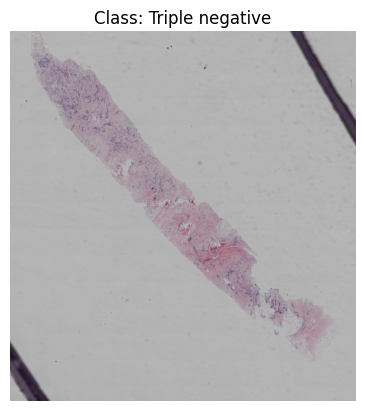

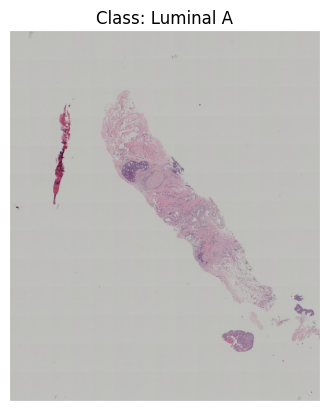

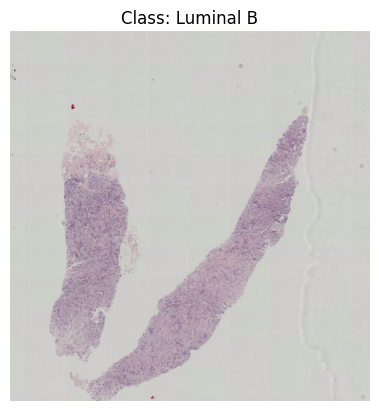

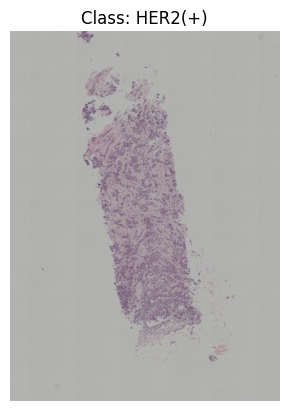

In [6]:
# Load image dataset
train_dir = 'data/train_data/'
test_dir = 'data/test_data/'
train_labels = pd.read_csv('data/train_labels.csv')

# Display sample images from each class
classes = train_labels['label'].unique()
for cls in classes:
    sample_image_path = train_dir + train_labels[train_labels['label'] == cls]['sample_index'].values[0]
    img = Image.open(sample_image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls}')
    plt.axis('off')
    plt.show()

In [ ]:
# Remove contaminated images from training data
import shutil
import os

# Parse the contaminated indices from the text file
contaminated_indices = []
with open('shrek_and_slimes.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line and line.isdigit():
            contaminated_indices.append(int(line))

print(f"Found {len(contaminated_indices)} contaminated samples to remove")

# Remove corresponding image and mask files
removed_count = 0
for idx in contaminated_indices:
    img_name = f'img_{idx:04d}.png'
    mask_name = f'mask_{idx:04d}.png'
    
    img_path = os.path.join(train_dir, img_name)
    mask_path = os.path.join(train_dir, mask_name)
    
    # Remove image if exists
    if os.path.exists(img_path):
        os.remove(img_path)
        removed_count += 1
    
    # Remove mask if exists
    if os.path.exists(mask_path):
        os.remove(mask_path)
        removed_count += 1

print(f"Removed {removed_count} files from {train_dir}")

# Update train_labels by removing contaminated indices
train_labels = train_labels[~train_labels['sample_index'].str.extract(r'(\d+)')[0].astype(int).isin(contaminated_indices)]
print(f"Training labels updated: {len(train_labels)} samples remaining")

<Axes: xlabel='label', ylabel='count'>

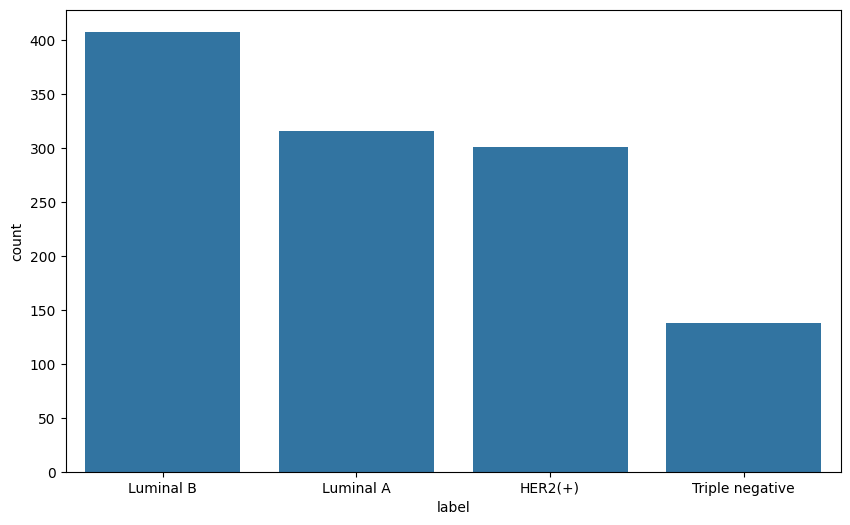

In [10]:
# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_labels, x='label', order=train_labels['label'].value_counts().index)